<a href="https://colab.research.google.com/github/paneri11/Machine-Learning-Practicals/blob/main/ML_LAB_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


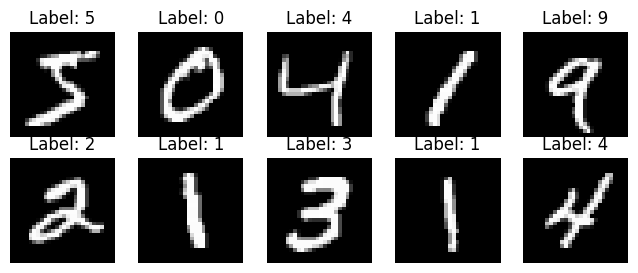

In [ ]:
plt.figure(figsize=(8, 3))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')  # Output layer for 10 classes
])

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [ ]:
history = model.fit(
  X_train, y_train_cat,
  epochs=10,
  batch_size=128,
  validation_split=0.1,
  verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8123 - loss: 0.6610 - val_accuracy: 0.9583 - val_loss: 0.1508
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9541 - loss: 0.1539 - val_accuracy: 0.9698 - val_loss: 0.1053
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9699 - loss: 0.1046 - val_accuracy: 0.9693 - val_loss: 0.1063
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9761 - loss: 0.0802 - val_accuracy: 0.9718 - val_loss: 0.0995
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9803 - loss: 0.0631 - val_accuracy: 0.9728 - val_loss: 0.0908
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9869 - loss: 0.0466 - val_accuracy: 0.9765 - val_loss: 0.0837
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9876 - loss: 0.0397 - val_accuracy: 0.9770 - val_loss: 0.0823
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9909 - loss: 0.0310 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat,
verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 97.92%


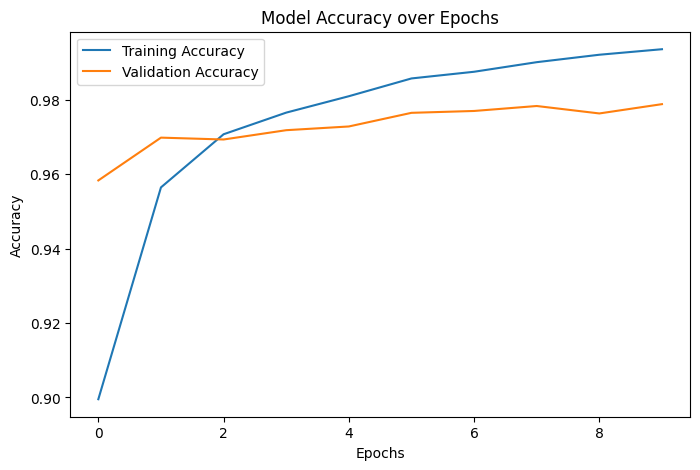

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


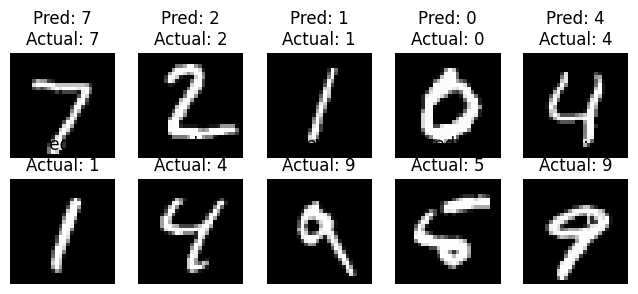

In [ ]:
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(8,3))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  plt.title(f"Pred: {predicted_classes[i]}\nActual: {y_test[i]}")
  plt.axis('off')
plt.show()
